# Ubicacion con GPS + IMU (Dead Reckoning)

## IMU (Inertial Measurement Unit)

La unidad de medicion inercial es un dispositivo que mide informacion acerca de la velocidad, orientacion y fuerzas gravitacionales mediante una combinacion de acelerometros y giroscopios.

Se componen principalmente por tres acelerometros ubicados en tres ejes ortogonales para medir las aceleraciones inerciales. De igual forma tres giroscopios estan ubicados de manera similar encargados de medir la rotacion.

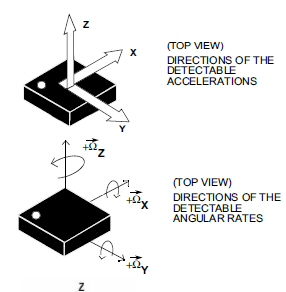

### Como medir la posicion con el IMU?

Existen una serie de calculos matematicos, de diferente complejidad, encargados de medir el posicionamiento de un objeto en 3 dimensiones basados en el vector fuerza aplicada y la rotacion con respecto a cada eje inercial.

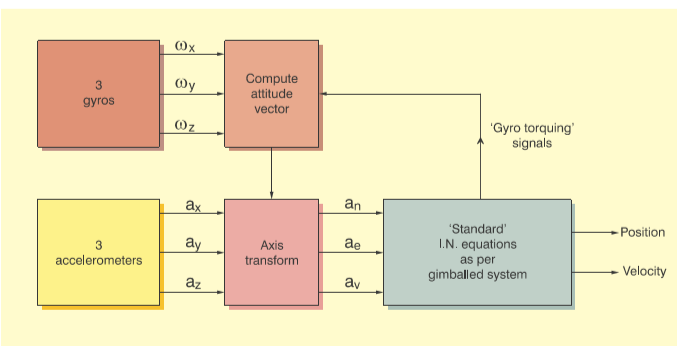

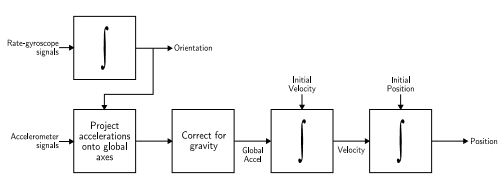

### Que tan precisa es esta posicion?

Los IMU individualmente, como se estudiaron anteriormente tienen un aumento en el error de posicionamiento muy grande y acumulable, lo que lo hace poco fiable para obtener posicionamiento con el planteamiento basico que se realiza y que adicionalmente se observara que es el realizado por las librerias actuales. Estas se especializan en usar parametros en especifico, por ejemplo usar el IMU para rotacion, o el IMU para deteccion de aceleraciones en los ejes, pero no precisamente para posicionamiento debido a estos errores.

Los errores basicos son:

Error de BIAS, o errores presentados cuando no hay ninguna alteracion en el IMU pero se encuentran cambios en las aceleraciones y giros.

En la aceleracion 
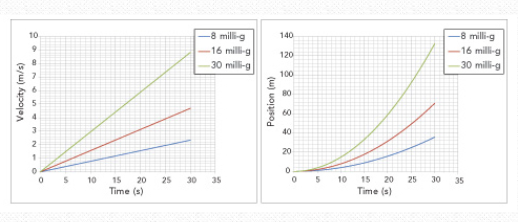

En el giroscopio
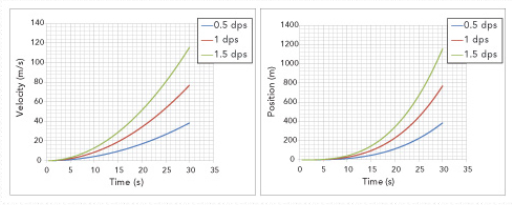

Entre otros tipos de errores, esto hace la medicion del posicionamiento bastante dificil.

### Librerias Disponibles

Cada IMU posee unos drivers especificos, usualmente desarrollados por terceros o usuarios que necesitaron respectivo dispositivo, es posible realizarlo con un conocimiento electronico y computacional avanzado.

Se dispone del IMU con referencia AltIMU-10 v4, el cual de su pagina de ventas 
https://www.pololu.com/product/2470/resources ofrece una serie de documentos disponibles para los usuarios en diferentes plataformas. Se diferencian dos dispositivos para interactuar con esta unidad, Raspberry Pi y Arduino 

Por posibilidad de programacion en un lenguaje conocido y en continuo desarrollo, con una amplia gama de librerias al alcance y compatibilidad con los sistemas operativos comues, la Raspberry Pi es el dispositivo mas adecuado para interactuar con el IMU. Cabe anadir que la interfaz grafica provista por este mismo hace parecer que se trabaja en un computador de escritorio comun.

Se tiene disponibilidad de dos librerias:

- MiniIMU-9 v2 por David Grayson
- RTIMULib2 

#### MiniIMU-9 v2

Permite observar facilmente una simulacion en 3D del movimiento del IMU basandose en el Giroscopio
https://www.youtube.com/watch?v=8daR-wtQIx0
sin embargo, solo era posible realizar la captura de datos desde la ventana de comando de Linux lo cual dificultaba el trabajo. Es  util para una revision inicial del funcionamiento del IMU.

#### RTIMULib2

Libreria muy util, se instala sobre Linux y al igual que MiniIMU9 permite obtener la trama de datos del IMU facilmente desde la ventana de comandos de Linux, sin embargo esta libreria trae una instalacion especial para Python la cual permite interactuar desde python con los datos del IMU. Esto facilita el trabajo de almacenamiento y recoleccion de datos, de igual forma la grafica y manipulacion de los datos.

Ambas librerias entregan la trama de datos, los cuaterniones, la matriz de cosenos y los angulos de euler.
De igual forma realizan una fusion de Giroscopio y Magnetometro para entregar una serie de medidas esenciales en la navegacion, Pitch, Roll y Yaw, los cuales representan de igual forma las rotaciones con respecto a ejes.

Como ejemplo ilustrativo del RTIMULib2 se observa el comportamiento del IMU usando el algoritmo que viene disponible por esta libreria para calcular los angulos con respecto a cada eje o los angulos de Roll Pitch y Yaw respectivos.
"Fusion.py"
https://github.com/RTIMULib/RTIMULib2/blob/master/Linux/python/tests/Fusion.py

Como se explico anteriormente estas librerias por si solas no calcular el posicionamiento, solo generan un elemento matematico que puede ayudar a ubicar el objeto pero no entrega unas coordenadas en especifico. Para eso es necesaria la ayuda de otra libreria, scikit-kinematics.

### Scikit-Kinematics

El funcionamient de Scikit-Kinematics hace bastante simple el calculo del posicionamiento aplicando ya un filtro kalman, entregando un quaternion como resultado.

Es posible tambien obtener el posicionamiento basado en los datos del acelerometro y el giroscopio, como se observa en el ejemplo.

De igual forma esta libreria permite manipular muchos datos algebraicos, desde Vectores hasta Matrices de rotacion y Quaterniones.

Es la unica libreria disponible que permite hacer el calculo de coordenadas en 3D basado en los datos obtenidos del IMU.